In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings                                                                 
warnings.filterwarnings('ignore') 


%matplotlib inline

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [12]:
data = pd.read_excel("avocado.xlsx")
data.drop("Unnamed: 0", axis=1,inplace=True)
names = ['Date', 'AveragePrice', 'Type', 'Year' ,'Region','Total Volume', '4046', '4225', '4770']
data = data.rename(columns=dict(zip(data.columns, names)))
data.head()

Date  AveragePrice       Type     Year     Region  Total Volume  \
0 2015-12-27          1.33   64236.62  1036.74   54454.85         48.16   
1 2015-12-20          1.35   54876.98   674.28   44638.81         58.33   
2 2015-12-13          0.93  118220.22   794.70  109149.67        130.50   
3 2015-12-06          1.08   78992.15  1132.00   71976.41         72.58   
4 2015-11-29          1.28   51039.60   941.48   43838.39         75.78   

      4046     4225    4770  XLarge Bags          type  year  region  
0  8696.87  8603.62   93.25          0.0  conventional  2015  Albany  
1  9505.56  9408.07   97.49          0.0  conventional  2015  Albany  
2  8145.35  8042.21  103.14          0.0  conventional  2015  Albany  
3  5811.16  5677.40  133.76          0.0  conventional  2015  Albany  
4  6183.95  5986.26  197.69          0.0  conventional  2015  Albany

In [13]:
data.info

<bound method DataFrame.info of            Date  AveragePrice       Type      Year     Region  Total Volume  \
0    2015-12-27          1.33   64236.62   1036.74   54454.85         48.16   
1    2015-12-20          1.35   54876.98    674.28   44638.81         58.33   
2    2015-12-13          0.93  118220.22    794.70  109149.67        130.50   
3    2015-12-06          1.08   78992.15   1132.00   71976.41         72.58   
4    2015-11-29          1.28   51039.60    941.48   43838.39         75.78   
...         ...           ...        ...       ...        ...           ...   
1512 2016-10-16          1.39  190846.01  57529.11   56366.66      17531.78   
1513 2016-10-09          1.51  178235.75  43325.87   52189.61      19419.57   
1514 2016-10-02          1.48  178410.82  46364.75   52893.38      16736.92   
1515 2016-09-25          1.47  189131.52  54110.79   53593.58      17495.42   
1516 2016-09-18          1.43  182978.30  43116.41   54193.42      16563.91   

          4046     

In [14]:
data.describe(include='all')

Date  AveragePrice          Type  \
count                            1517   1517.000000  1.517000e+03   
unique                            NaN           NaN           NaN   
top                               NaN           NaN           NaN   
freq                              NaN           NaN           NaN   
mean    2015-08-19 07:10:57.350032896      1.074990  1.601879e+06   
min               2015-01-04 00:00:00      0.490000  3.875074e+04   
25%               2015-04-12 00:00:00      0.980000  1.474700e+05   
50%               2015-07-12 00:00:00      1.080000  4.027919e+05   
75%               2015-11-15 00:00:00      1.190000  9.819751e+05   
max               2016-12-25 00:00:00      1.680000  4.465546e+07   
std                               NaN      0.188891  4.433143e+06   

                Year        Region  Total Volume          4046          4225  \
count   1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    6.464387e+05  6.114375e+05  5.040550e+04  2.935974e+05  2.487736e+05   
min     4.677200e+02  1.783770e+03  0.000000e+00  3.311770e+03  3.311770e+03   
25%     2.040034e+04  4.147606e+04  9.112500e+02  3.620689e+04  2.972722e+04   
50%     8.175117e+04  1.186649e+05  7.688170e+03  7.397906e+04  6.237569e+04   
75%     3.775785e+05  4.851503e+05  2.916730e+04  1.576097e+05  1.461994e+05   
max     1.893304e+07  1.895648e+07  1.381516e+06  6.736304e+06  5.893642e+06   
std     1.947614e+06  1.672906e+06  1.377812e+05  7.579765e+05  6.474765e+05   

                4770    XLarge Bags          type         year      region  
count   1.517000e+03    1517.000000          1517  1517.000000        1517  
unique           NaN            NaN             1          NaN          51  
top              NaN            NaN  conventional          NaN  California  
freq             NaN            NaN          1517          NaN          76  
mean    4.264205e+04    2181.771074           NaN  2015.162821         NaN  
min     0.000000e+00       0.000000           NaN  2015.000000         NaN  
25%     5.407400e+02       0.000000           NaN  2015.000000         NaN  
50%     5.044350e+03       0.000000           NaN  2015.000000         NaN  
75%     2.926767e+04     401.480000           NaN  2015.000000         NaN  
max     1.121076e+06  108072.790000           NaN  2016.000000         NaN  
std     1.182157e+05    7455.712144           NaN     0.369324         NaN

In [15]:
data.Type.unique()

array([ 64236.62,  54876.98, 118220.22, ..., 178410.82, 189131.52,
       182978.3 ])

<Axes: xlabel='AveragePrice', ylabel='Type'>

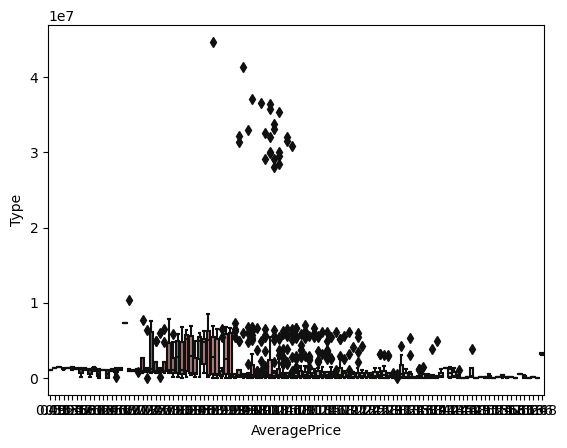

In [17]:
sns.boxplot(y="Type", x="AveragePrice", data=data, palette = 'pink')

In [18]:
label = LabelEncoder()
dicts = {}

label.fit(data.Type.drop_duplicates()) 
dicts['Type'] = list(label.classes_)
data.Type = label.transform(data.Type)

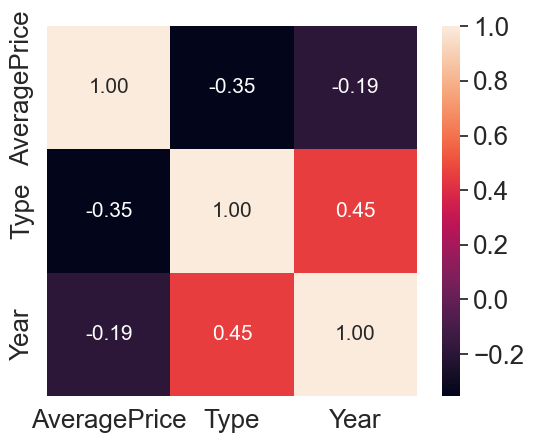

In [21]:
cols = ['AveragePrice','Type','Year',]
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

In [27]:
data = sns.FacetGrid(data, x_vars=['Small', 'Large', 'XLarge'], y_vars='TotalVolume', size=5, aspect=1, kind='reg')

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'x_vars'

In [24]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='Region',data=data, hue='Year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

In [30]:
X=data[['AveragePrice', 'Type', 'Year' ,'Region','Total Volume', '4046', '4225', '4770']] #feature columns
y=data.Type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (1213, 8)
Y Train Shape  (1213,)
X Test Shape  (304, 8)
Y Test Shape  (304,)


In [32]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])


Accuracy score for Logistic Regression test data is: 0.0
----------------------------------------------------------------------------------------


ValueError: Length mismatch: Expected axis has 362 elements, new values have 2 elements